Lakukan Text data analysis:
1. Distribusi Frekuensi jumlah huruf pada suatu data
2. Distribusi Frekuensi jumlah kata pada suatu data
3. Distribusi Frekuensi panjang kata rata-rata pada suatu data
4. Distribusi Frekuensi kata yang sering keluar
5. Distribusi N-gram
Tampilkan semua plot dari 1-4
Tampilkan/print data 10 bi-gram yang paling banyak keluar.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [2]:
# memanggil data
df = pd.read_csv('kompas_20211201_clean.csv')
display(df)

,date,title
0,2021-12-01,genoa vs ac milan shevchenko mantan klub kesul...
1,2021-12-01,odha depok stigma negatif
2,2021-12-01,pemprov jakarta bentuk tim khusus awasi alat m...
3,2021-12-01,penonton lokal piala aff acuhkan aturan
4,2021-12-01,pekan penumpang bandara soekarnohatta capai orang
...,...,...
195,2021-12-01,pemerintah terbitkan skb menteri perjelas kete...
196,2021-12-01,densus sita senapan m peluru terduga teroris s...
197,2021-12-01,foto viral pasutri motor menara eiffel ceritanya
198,2021-12-01,momen indro satukan warkop dki kasino dono bicara


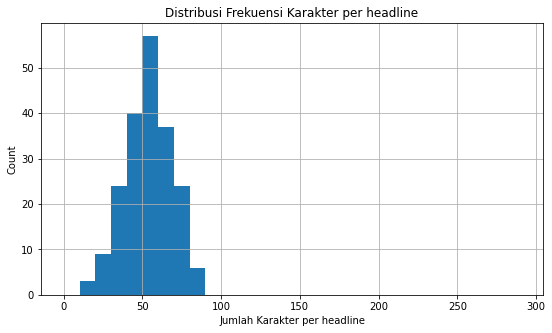

In [3]:
# 1. Distribusi Frekuensi jumlah huruf pada suatu data
# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 300, 10)
df['title'].str.len().hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Frekuensi Karakter per headline')
plt.xlabel('Jumlah Karakter per headline')
plt.ylabel('Count')

plt.show()

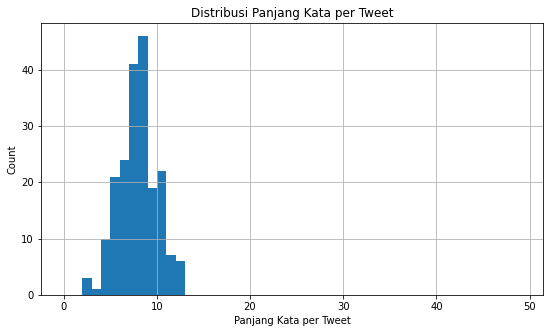

In [4]:
# 2. Distribusi Frekuensi jumlah kata pada suatu data
# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 50)
df['title'].str.split().map(lambda x: len(x)).hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Kata per Tweet')
plt.xlabel('Panjang Kata per Tweet')
plt.ylabel('Count')

plt.show()

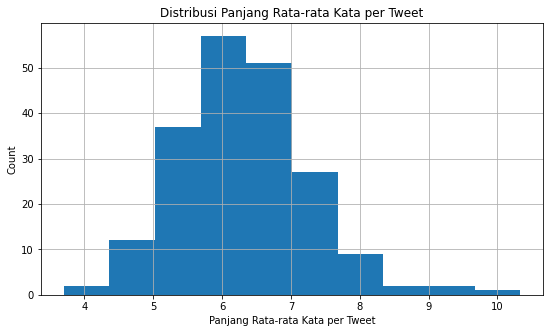

In [5]:
# 3. Distribusi Frekuensi panjang kata rata-rata pada suatu data
# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Rata-rata Kata per Tweet')
plt.xlabel('Panjang Rata-rata Kata per Tweet')
plt.ylabel('Count')

plt.show()

In [6]:
# 4. Distribusi Frekuensi kata yang sering keluar
# melakukan tokenization pada dataset
df['title'] = df['title'].apply(lambda x: word_tokenize(str(x)))
 
# memasukkan pada semua token tersebut pada satu list yang sama
 
clean_words = [word for tweet in df['title'] for word in tweet]
 
# melihat berapa sample dan keluarannya
fqdist = FreqDist(clean_words)

print(fqdist)

# menampilkan frekuensi kata terbanyak dengan limit 25 
freq_kata = fqdist.most_common(25)

print(freq_kata)

<FreqDist with 1064 samples and 1494 outcomes>
[('jakarta', 10), ('covid', 10), ('lagu', 10), ('indonesia', 9), ('polisi', 9), ('warga', 9), ('lirik', 9), ('chord', 8), ('bwf', 7), ('world', 7), ('tour', 7), ('finals', 7), ('omicron', 6), ('teroris', 6), ('korban', 6), ('vs', 5), ('aturan', 5), ('varian', 5), ('jokowi', 5), ('siapkan', 5), ('menteri', 5), ('hasil', 5), ('kerja', 5), ('perjalanan', 5), ('piala', 4)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25 non-null     object
 1   1       25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


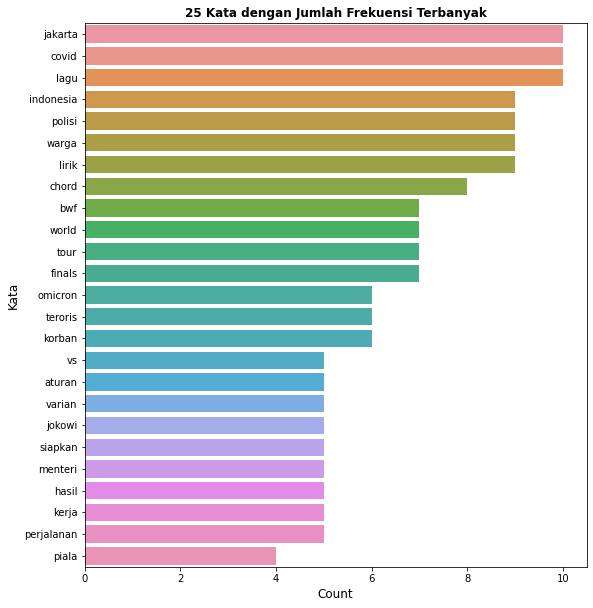

In [8]:
f_kata = pd.DataFrame(freq_kata)
f_kata.info()

fig, ax = plt.subplots(figsize = (9,10))

# plot the data 
sns.barplot(data = f_kata, x = f_kata[1], y = f_kata[0], orient = 'h')

# membuat judul dan label untuk x dan y axis
plt.title('25 Kata dengan Jumlah Frekuensi Terbanyak', fontweight = 'bold')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Kata', fontsize = 12)

plt.show()

In [9]:
# 5. Distribusi N-gram
hasil = pd.Series(nltk.ngrams(clean_words, 2)).value_counts()[:10]
print(hasil)

(chord, lagu)         8
(lirik, chord)        8
(tour, finals)        7
(bwf, world)          7
(world, tour)         7
(terduga, teroris)    4
(ppkm, level)         4
(piala, aff)          4
(varian, omicron)     4
(libur, natal)        3
dtype: int64


Berdasarkan hasil analisis text yang diperoleh dari indeks.kompas.com, dapat disimpulkan bahwa :

1. Untuk grafik Jumlah Karakter per headline, distribusi terbanyak berada pada rentang 40 - 70 karakter per headline.

2. Untuk grafik Distribusi Panjang Kata per headline, distribusi terbanyak berada pada rentang 7 - 9 kata per headline.

3. Untuk grafik Distribusi Panjang Rata-rata Kata per headline, distribusi terbanyak berada pada rentang 5 - 7 karakter per kata per headline.

4. Artinya, mayoritas kata pada headline berita tersebut berada pada 7 sampai 9 kata dengan setiap kata berada pada rentang 5 sampai 7 karakter dan totalnya berada pada 40 sampai dengan 70 karakter.

6. Terdapat 3 kata dengan jumlah frekuensi terbanyak, yaitu jakarta, covid, dan lagu secara berturut-turut

7. Tema yang ditampilkan dalam berita itu cukup beragam, mulai dari lirik lagu, varian omicron, bwf world, serta piala aff.